In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [28]:
def histoplot(df, dfvar, num_bins = 10, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()

    fig.tight_layout()
    plt.show()

In [48]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [58]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

## Sensor data
- Contains a vector of times and chage

In [64]:
df = pd.read_csv("sensor_data.csv", header=0)
df

,event,sensor_id,time,charge
0,217,4,0,7
1,217,4,1,6
2,217,4,2,8
3,217,4,3,4
4,217,4,4,6
...,...,...,...,...
4225000,999,2,95,1
4225001,999,2,98,1
4225002,999,2,104,1
4225003,999,2,122,1


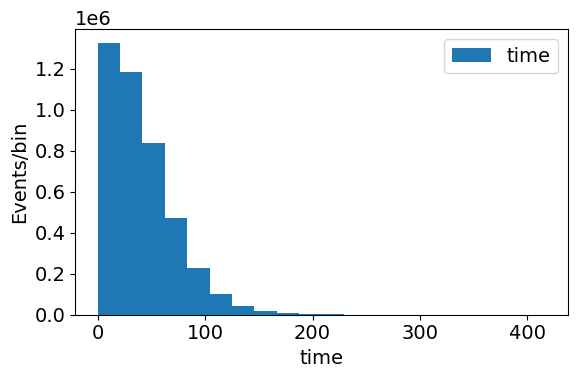

In [65]:
histoplot(df, "time", num_bins = 20, figsize=(6, 4), title="")

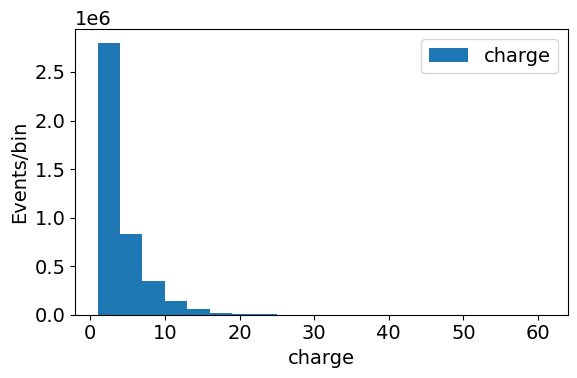

In [66]:
histoplot(df, "charge", num_bins = 20, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [67]:
df = pd.read_csv("integrated_sensor_data.csv", header=0)
df

,event,sensor_id,amplitude
0,217,4,162
1,217,52,469
2,217,6,127
3,217,13,147
4,217,26,139
...,...,...,...
63995,999,51,170
63996,999,3,151
63997,999,39,120
63998,999,8,138


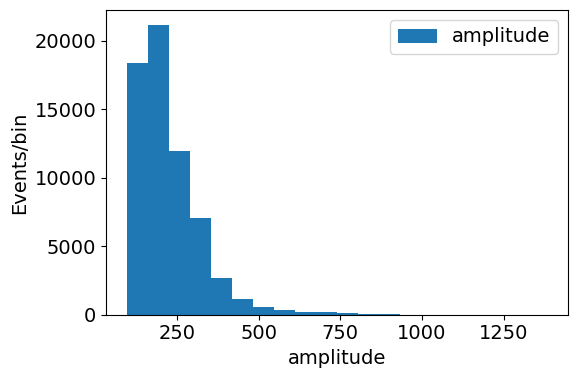

In [68]:
histoplot(df, "amplitude", num_bins = 20, figsize=(6, 4), title="")

### Plot a few events

In [69]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [70]:
charge_matrix

array([[139., 150., 189., 274., 350., 446., 446., 366.],
       [129., 198., 204., 324., 379., 509., 493., 401.],
       [138., 162., 240., 324., 329., 426., 385., 358.],
       [181., 147., 197., 230., 296., 311., 287., 239.],
       [157., 153., 175., 219., 238., 268., 224., 214.],
       [160., 170., 159., 171., 174., 190., 146., 134.],
       [165., 147., 170., 164., 151., 176., 156., 144.],
       [119., 142., 152., 151., 162., 163., 143., 143.]])

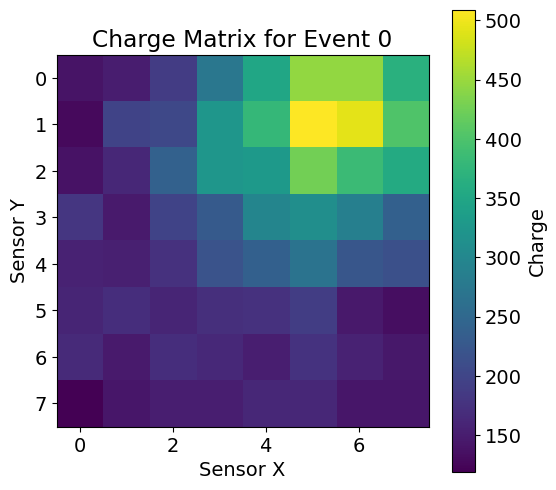

In [71]:
plot_image(charge_matrix)

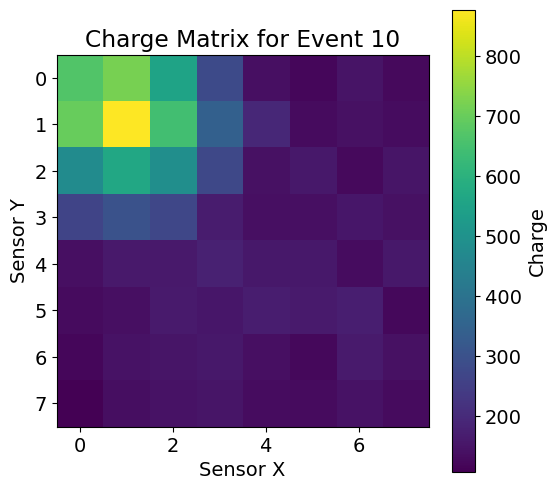

In [72]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

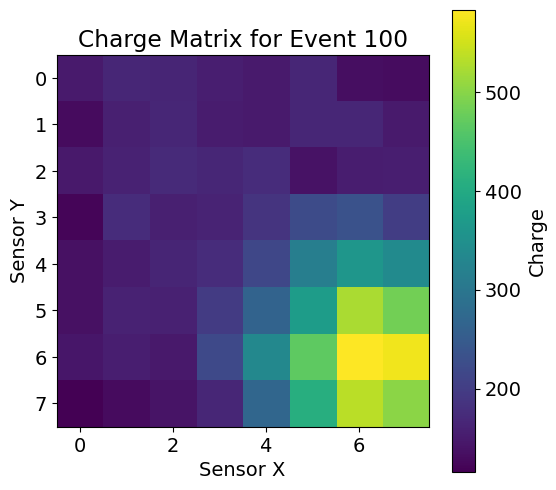

In [73]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)